In [8]:
!pip install geopy

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.core.display import display, HTML
import time


C:\Users\HP\AppData\Local\Temp\ipykernel_26652\631953607.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [12]:
data1= pd.read_csv("zomato_data.csv")

In [14]:
data1.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


####  Data preprocessing

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [18]:
data1.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


####  Replace '-' values with NaN


In [20]:
data1['rate'].replace('-',np.nan, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_26652\710890507.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['rate'].replace('-',np.nan, inplace=True)


In [36]:
data1['rate']= data1['rate'].str.replace('/5','',regex=False)
data1['rate'] = pd.to_numeric(data1['rate'],errors='coerce')

In [38]:
data1['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [44]:
median_rating = data1['rate'].median()

In [46]:
median_rating

3.7

In [48]:
data1['rate'].fillna(median_rating,inplace=True)

#### Remove commas from numeric strings ('1,000' → '1000')


In [54]:
# data1['approx_costfor_two_people']
data1['approx_costfor_two_people']= data1['approx_costfor_two_people'].str.replace(',','',regex=False)
data1['approx_costfor_two_people'] = pd.to_numeric(data1['approx_costfor_two_people'],errors='coerce')

In [56]:
data1['approx_costfor_two_people']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_costfor_two_people, Length: 51717, dtype: float64

In [58]:
median_cost = data1['approx_costfor_two_people'].median()

In [60]:
median_cost

400.0

In [62]:
data1['approx_costfor_two_people'].fillna(median_cost,inplace=True)

In [64]:
data1.shape

(51717, 10)

#### Replace NaN with "Not Available", "Other", and "Unknown"

In [66]:
data1['rest_type'].fillna("Unkown", inplace=True)                  
data1['dish_liked'].fillna("Not Available", inplace=True)                
data1['cuisines'].fillna("Other", inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_26652\1122660431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['rest_type'].fillna("Unkown", inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_26652\1122660431.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

### Votes column

In [74]:
median_vote = data1['votes'].median()

In [78]:
data1['votes'].fillna(median_vote, inplace= True)

C:\Users\HP\AppData\Local\Temp\ipykernel_26652\3699693045.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['votes'].fillna(median_vote, inplace= True)


### Mapping

In [95]:
data1['online_order']=data1['online_order'].map({'Yes':1,'No':0})
data1['book_table']=data1['book_table'].map({'Yes':1,'No':0})

#### Data type Conversion

In [634]:
data1['rate'] = data1['rate'].astype('float')
data1['votes'] = data1['votes'].astype('int')
data1['online_order'] = data1['online_order'].astype('int')
data1['approx_costfor_two_people'] = data1['approx_costfor_two_people'].astype('int') 


In [103]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int32  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 3.6+ MB


In [107]:
data1.isnull().sum()

online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
dtype: int64

In [109]:
data1.describe()

,online_order,book_table,rate,votes,approx_costfor_two_people
count,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000
mean,0.588665,0.124698,3.700362,283.697527,554.391689
std,0.492080,0.330379,0.395391,803.838853,437.563723
min,0.000000,0.000000,1.800000,0.000000,40.000000
25%,0.000000,0.000000,3.500000,7.000000,300.000000
50%,1.000000,0.000000,3.700000,41.000000,400.000000
75%,1.000000,0.000000,3.900000,198.000000,650.000000
max,1.000000,1.000000,4.900000,16832.000000,6000.000000


### merge the dfs

In [654]:
data2= pd.read_csv("Geographical Coordinates.csv")

In [656]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listed_incity  26 non-null     object 
 1   Latitude       26 non-null     float64
 2   Longitude      26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 756.0+ bytes


In [658]:
merged_df = pd.merge(data1, data2, on='listed_incity', how='left')

In [662]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int32  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int32  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
 10  potential_revenue          51717 non-null  float64
 11  Latitude                   46137 non-null  float64
 12  Longitude                  46137 non-null  float64
dtypes: float64(4), int32(3), int64(1), object(5)
m

## Exploratory data analysis

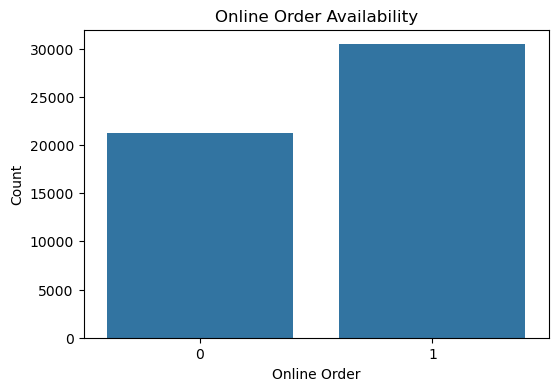

In [677]:
plt.figure(figsize=(6,4))
sns.countplot(x="online_order", data= data1)
plt.title("Online Order Availability")
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.show()

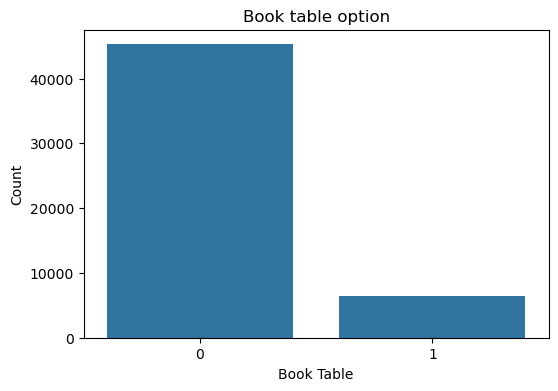

In [683]:
plt.figure(figsize=(6,4))
sns.countplot(x="book_table", data = data1)
plt.title("Book table option")
plt.xlabel("Book Table")
plt.ylabel("Count")
plt.show()

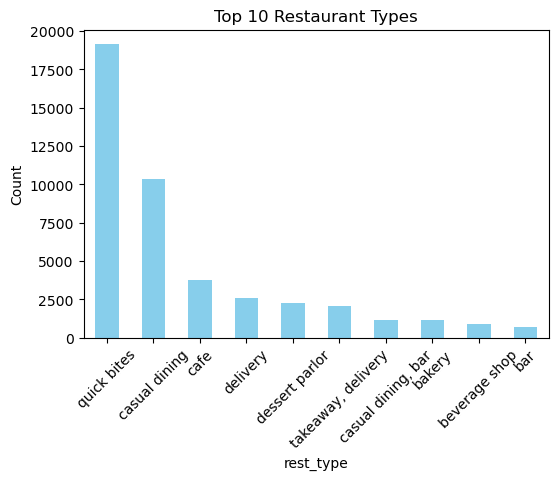

In [730]:
plt.figure(figsize=(6,4))
merged_df['rest_type'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Restaurant Types")
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

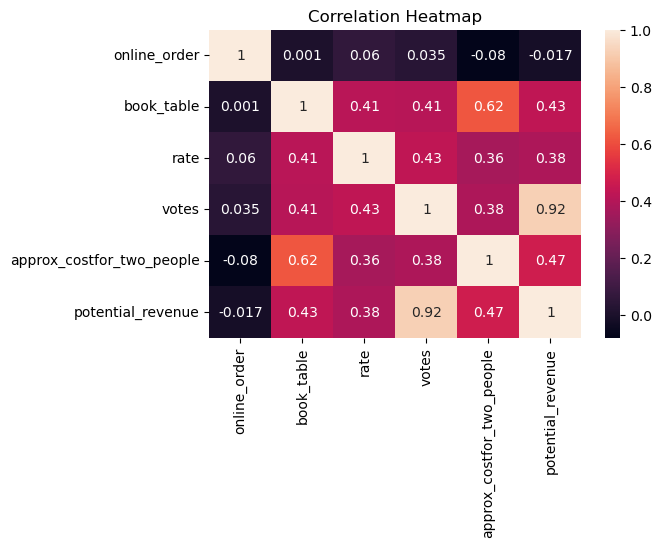

In [732]:
plt.figure(figsize=(6,4))
corr = data1.corr(numeric_only = True)
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

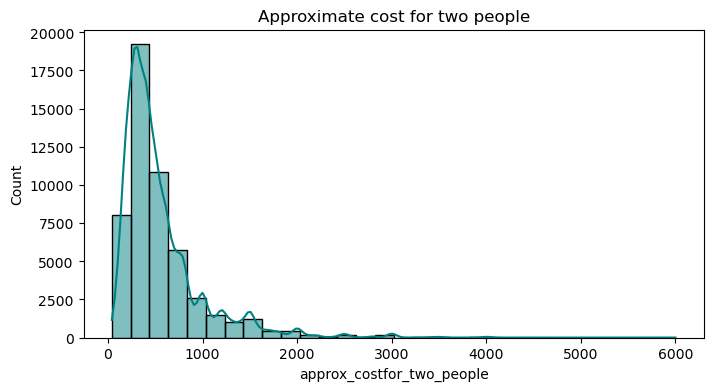

In [736]:
plt.figure(figsize=(8,4))
sns.histplot(merged_df['approx_costfor_two_people'], bins = 30, kde= True, color='teal')
plt.title("Approximate cost for two people")
plt.show()

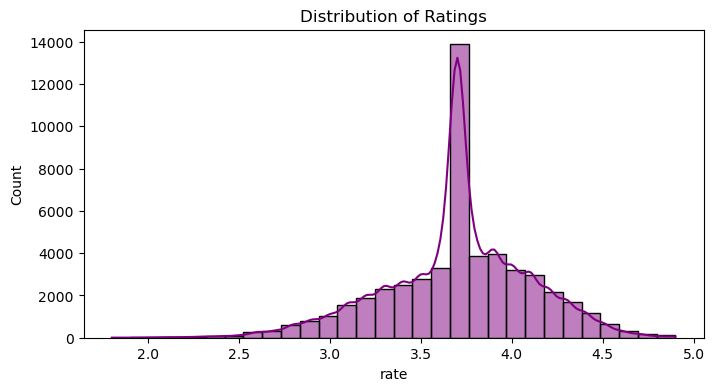

In [738]:
plt.figure(figsize=(8,4))
sns.histplot(merged_df['rate'], bins= 30, kde=True, color = 'purple')
plt.title('Distribution of Ratings')
plt.show()

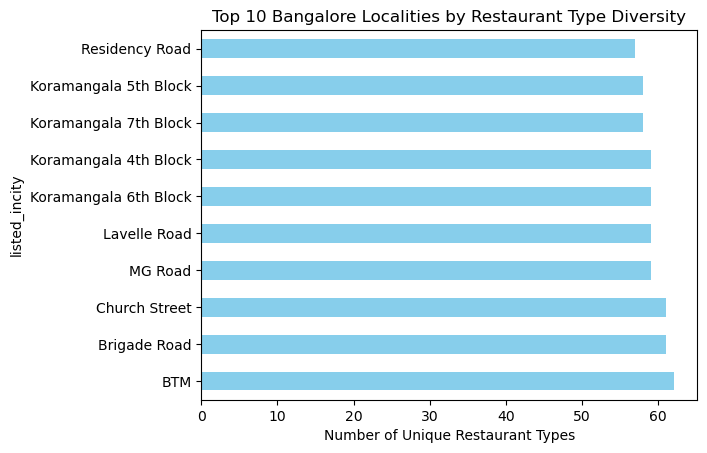

In [777]:
type_diversity.head(10).plot(kind='barh', color='skyblue')
plt.xlabel('Number of Unique Restaurant Types')
plt.title('Top 10 Bangalore Localities by Restaurant Type Diversity')
plt.show()


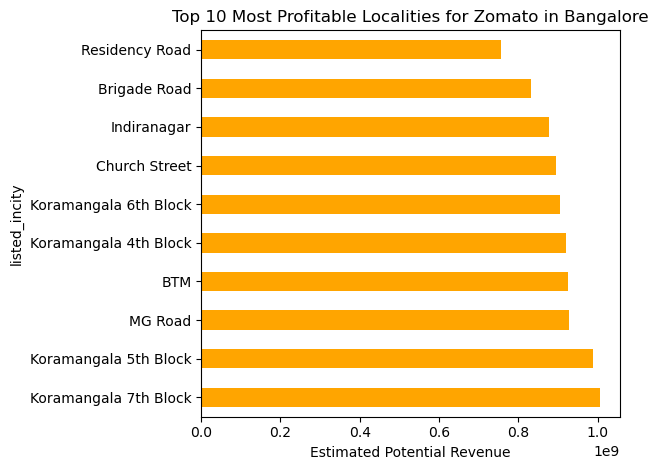

In [773]:
area_revenue.head(10).plot(kind='barh', color='orange')
plt.xlabel('Estimated Potential Revenue')
plt.title('Top 10 Most Profitable Localities for Zomato in Bangalore')
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_26652\2984999548.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaint_counts.values[:5], y=complaint_counts.index[:5], palette="Reds_r")


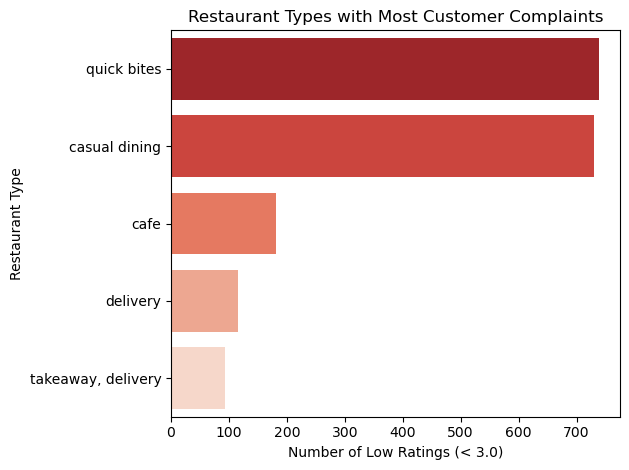

In [748]:
sns.barplot(x=complaint_counts.values[:5], y=complaint_counts.index[:5], palette="Reds_r")
plt.xlabel("Number of Low Ratings (< 3.0)")
plt.ylabel("Restaurant Type")
plt.title("Restaurant Types with Most Customer Complaints")
plt.tight_layout()
plt.show()


In [769]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure rate is clean (as float)
merged_df['rate'] = merged_df['rate'].astype(str)
merged_df['rate'] = merged_df['rate'].replace(['NEW', '-', 'nan'], None)
merged_df['rate'] = merged_df['rate'].str.extract(r'(\d+\.\d+)')
merged_df['rate'] = merged_df['rate'].astype(float)

grouped = merged_df.groupby(['listed_incity', 'rest_type']).agg({
    'votes': 'sum',
    'rate': 'mean'
}).reset_index()


grouped_sorted = grouped.sort_values(by='votes', ascending=False)


print("🔝 Top 10 city + restaurant type combos by votes:")
print(grouped_sorted.head(10))


🔝 Top 10 city + restaurant type combos by votes:
              listed_incity      rest_type   votes      rate
17                      BTM  casual dining  301341  3.755980
802   Koramangala 4th Block  casual dining  274652  3.802982
918   Koramangala 6th Block  casual dining  270585  3.823230
860   Koramangala 5th Block  casual dining  267586  3.825157
977   Koramangala 7th Block  casual dining  264713  3.811694
664               Jayanagar  casual dining  251516  3.764646
559             Indiranagar  casual dining  243997  3.806107
1278       Old Airport Road  casual dining  197176  3.838783
1096                MG Road  casual dining  193339  3.831959
365           Church Street  casual dining  189302  3.802638


C:\Users\HP\AppData\Local\Temp\ipykernel_26652\2177673024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='votes', y=top10['listed_incity'] + ' | ' + top10['rest_type'], data=top10, palette='viridis')


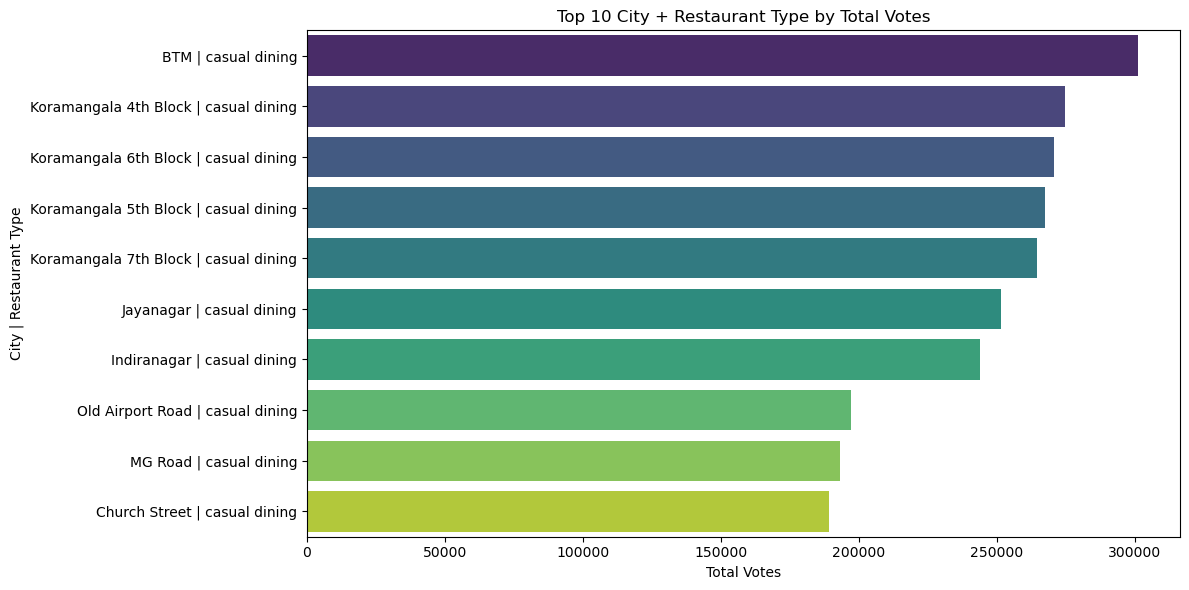

In [771]:
top10 = grouped_sorted.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='votes', y=top10['listed_incity'] + ' | ' + top10['rest_type'], data=top10, palette='viridis')
plt.title("Top 10 City + Restaurant Type by Total Votes")
plt.xlabel("Total Votes")
plt.ylabel("City | Restaurant Type")
plt.tight_layout()
plt.show()


### MCQS

#### Q1. What is the shape of the given dataset?

In [421]:
data1.shape

(51717, 10)

#### Q2. How many restaurants serve North Indian cuisine?


In [115]:
north_indian_count = data1[data1['cuisines'].str.contains('North Indian', na= False)].shape[0]
print(north_indian_count)

21085


#### Q3.What cuisine is most commonly offered by restaurants in Bangalore?


In [143]:
cuisine_series = data1['cuisines'].dropna()

In [145]:
split_cuisines = cuisine_series.str.split(', ')

In [177]:
split_cuisines

0                [North Indian, Mughlai, Chinese]
1                   [Chinese, North Indian, Thai]
2                        [Cafe, Mexican, Italian]
3                    [South Indian, North Indian]
4                      [North Indian, Rajasthani]
                           ...                   
51712                               [Continental]
51713                               [Finger Food]
51714                               [Finger Food]
51715                               [Finger Food]
51716    [Finger Food, North Indian, Continental]
Name: cuisines, Length: 51717, dtype: object

In [147]:
exploded_cuisines = split_cuisines.explode()

In [179]:
exploded_cuisines

0        North Indian
0             Mughlai
0             Chinese
1             Chinese
1        North Indian
             ...     
51714     Finger Food
51715     Finger Food
51716     Finger Food
51716    North Indian
51716     Continental
Name: cuisines, Length: 126864, dtype: object

In [149]:
most_common_cuisine = exploded_cuisines.value_counts().idxmax()

In [152]:
print(" Most commonly offered by restaurants in Bangalore: ", most_common_cuisine)

 Most commonly offered by restaurants in Bangalore:  North Indian


#### Q4. Which locality in Bangalore has the highest average cost for dining (for two people)

In [170]:
data1['listed_incity'].idxmax()

50097

In [185]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int32  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 3.6+ MB


In [431]:
data1.groupby('listed_incity')['approx_costfor_two_people'].mean().idxmax()

'Church Street'

#### Q5. Which restaurant type has the top rating with over 1000 votes?


In [210]:
data_filtered = data1[data1['votes']>1000]

In [240]:
data_filtered.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
7,1,1,4.6,2556,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes,Banashankari
37,1,0,4.2,1647,Casual Dining,"Noodles, Momos, Veg Manchow Soup, Kung Pao Chi...","Chinese, Thai, Momos",600,Delivery,Banashankari
38,1,0,4.4,4884,Casual Dining,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto...","North Indian, Mughlai, South Indian, Chinese",750,Delivery,Banashankari
44,1,1,4.6,2556,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Delivery,Banashankari
54,0,0,4.0,1047,Quick Bites,"Pasta, Momos, Rolls, Chicken Roll, Chilli Chic...","Italian, Continental, Fast Food, Chinese, Momos",450,Delivery,Banashankari


In [230]:
avg_rating = data_filtered.groupby('rest_type')['rate'].mean()

In [232]:
restaurant= avg_rating.idxmax()

In [234]:
restaurant

'Bakery'

In [243]:
data1.head(2)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari


#### Q6. How much does it cost at minimum to eat out in Bangalore?


In [521]:
# data1['approx_costfor_two_people'].min()

np.min(data1['approx_costfor_two_people'][data1['approx_costfor_two_people'].isin([200,500,300,1000])])

200.0

#### Q7. What percentage of total online orders is received by restaurants in Banashankari?

In [304]:
data_city = data1[data1['listed_incity'].str.lower() == 'banashankari']

In [306]:
data_city

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
858,0,0,3.3,62,Bar,Chilli Chicken,"South Indian, North Indian, Chinese",800,Drinks & nightlife,Banashankari
859,0,0,3.1,30,Bar,Not Available,"Chinese, North Indian",1000,Drinks & nightlife,Banashankari
860,0,0,3.7,0,Bar,Not Available,"Fast Food, Finger Food",500,Drinks & nightlife,Banashankari
861,0,0,3.0,98,Bar,"Paneer Tikka, Dal Kichadi, French Fries","North Indian, Chinese",800,Drinks & nightlife,Banashankari


In [328]:
countss  = data_city['online_order'].count()
print(countss)

863


In [330]:
summ = data_city['online_order'].sum()
print(summ)

546


In [332]:
percentage_online = (546/863) * 100

In [334]:
percentage_online

63.26767091541136

#### Q8. Which locality has the most restaurants with over 500 votes and a rating below 3.0?

In [356]:
new_df= data1[(data1['votes'] > 500) & (data1['rate'] > 3.0)]


In [358]:
new_df

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
7,1,1,4.6,2556,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes,Banashankari
9,1,0,4.2,504,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51699,1,1,4.1,1218,Pub,"Cocktails, Beer, Long Island Iced Tea, Pasta, ...","Asian, American, Mexican",1200,Pubs and bars,Whitefield
51700,0,1,4.1,1003,"Bar, Casual Dining","Mocktails, Cocktails, Pizza, Chicken Tikka, Na...","Continental, North Indian, Italian",1500,Pubs and bars,Whitefield
51701,1,1,4.1,673,Pub,"Cocktails, Wheat Beer, Bruschettas, Pasta, Bur...","Finger Food, North Indian, Chinese, Italian",1400,Pubs and bars,Whitefield
51702,0,0,4.0,1094,Bar,"Cocktails, Beer, Pizza, Long Island Iced Tea, ...","Finger Food, American, Asian, Italian",1450,Pubs and bars,Whitefield


In [800]:
data1[(data1['votes'] > 500) & (data1['rate'] < 3.0)]['listed_incity'].value_counts()

listed_incity
Brookefield              8
Whitefield               6
Indiranagar              4
Old Airport Road         4
Bellandur                3
Marathahalli             3
Banashankari             2
Koramangala 4th Block    2
Koramangala 5th Block    2
Koramangala 6th Block    2
Koramangala 7th Block    2
Sarjapur Road            2
HSR                      1
Kalyan Nagar             1
Kammanahalli             1
Name: count, dtype: int64

#### 9. Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?

In [439]:
data1.groupby('listed_incity')['rest_type'].nunique().sort_values(ascending=False).head()


listed_incity
BTM              62
Brigade Road     61
Church Street    61
MG Road          59
Lavelle Road     59
Name: rest_type, dtype: int64

#### Q10.What's the average cost difference between buffet and delivery restaurants?

In [443]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int32  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 3.6+ MB


In [541]:
data1['votes'].value_counts()

votes
0       10027
4        1140
6         992
7         872
9         738
        ...  
3673        1
1862        1
3909        1
2155        1
843         1
Name: count, Length: 2328, dtype: int64

In [472]:
buffets = data1[data1['listed_intype'].str.lower() == "buffet"]

In [474]:
buffets

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,casual dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,1,0,4.1,787,casual dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,1,0,3.8,918,"cafe, casual dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,0,0,3.7,88,quick bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,0,0,3.8,166,casual dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
48857,0,0,3.9,237,bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,400.0,Buffet,Sarjapur Road
48858,0,0,2.8,12,food court,Not Available,Continental,1000.0,Buffet,Sarjapur Road
48859,0,0,3.0,120,casual dining,"Salads, Gulab Jamun, Pasta, Fish, Rasgulla, Co...","North Indian, Italian, Chinese, Asian",1000.0,Buffet,Sarjapur Road
48860,0,0,3.5,95,casual dining,"Pasta, Lunch Buffet, Pizza, Noodles, Draught Beer","Chinese, Italian, North Indian",700.0,Buffet,Sarjapur Road


In [500]:
buffet_avg =buffets['approx_costfor_two_people'].mean()

In [492]:
delivery = data1[data1['listed_intype'].str.lower() == "delivery"]

In [502]:
delivery_mean = delivery['approx_costfor_two_people'].mean()

In [504]:
difference = buffet_avg - delivery_mean

In [506]:
difference

831.2513659898209

#### 11 . What is the maximum number of votes received by any restaurant with online ordering?

In [509]:
max_vote = data1['votes'].max()

In [511]:
max_vote

16832

In [535]:
data1.groupby('votes')['online_order'].max()

votes
0        1
1        1
2        1
4        1
5        1
        ..
14723    0
14726    0
14956    0
16345    1
16832    1
Name: online_order, Length: 2328, dtype: int64

In [537]:
data1

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,casual dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,1,0,4.1,787,casual dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,1,0,3.8,918,"cafe, casual dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,0,0,3.7,88,quick bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,0,0,3.8,166,casual dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,0,0,3.6,27,bar,Not Available,Continental,1500.0,Pubs and bars,Whitefield
51713,0,0,3.7,0,bar,Not Available,Finger Food,600.0,Pubs and bars,Whitefield
51714,0,0,3.7,0,bar,Not Available,Finger Food,2000.0,Pubs and bars,Whitefield
51715,0,1,4.3,236,bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield


In [551]:
data1[data1['online_order'] == 1].sort_values('votes', ascending=False).head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
50059,1,1,4.9,16832,microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife,Sarjapur Road
49627,1,1,4.9,16832,microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Dine-out,Sarjapur Road
49170,1,1,4.9,16832,microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Delivery,Sarjapur Road
4801,1,1,4.9,16345,microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Dine-out,Bellandur
4944,1,1,4.9,16345,microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife,Bellandur


In [553]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int32  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 3.7+ MB


#### 12. What is the average rating of restaurants that serve both North Indian and Chinese cuisines?

In [561]:
data1[
    data1['cuisines'].str.contains('North Indian', case=False, na=False) &
    data1['cuisines'].str.contains('Chinese', case=False, na=False)
]['rate'].mean()

3.5919080217658412

#### 13. What is the most profitable area for Zomato based on potential revenue estimation?


In [567]:
# online_orders = data1[data1['online_order'] ==1]

# online_orders['revenue'] =online_orders['approx_costfor_two_people'] * online_orders['votes']

# online_orders.sort_values('revenue', ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_26652\2860667925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_orders['revenue'] =online_orders['approx_costfor_two_people'] * online_orders['votes']


,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,revenue
49170,1,1,4.9,16832,microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Delivery,Sarjapur Road,26931200.0
50059,1,1,4.9,16832,microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife,Sarjapur Road,26931200.0
49627,1,1,4.9,16832,microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Dine-out,Sarjapur Road,26931200.0
4801,1,1,4.9,16345,microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Dine-out,Bellandur,26152000.0
4944,1,1,4.9,16345,microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife,Bellandur,26152000.0
...,...,...,...,...,...,...,...,...,...,...,...
3171,1,0,3.7,0,delivery,Not Available,Biryani,500.0,Delivery,Basavanagudi,0.0
3172,1,0,3.7,0,delivery,Not Available,Chinese,600.0,Delivery,Basavanagudi,0.0
3173,1,0,3.7,0,quick bites,Not Available,"Pizza, Beverages, Ice Cream",200.0,Delivery,Basavanagudi,0.0
1161,1,0,3.7,0,quick bites,Not Available,Chinese,300.0,Delivery,Bannerghatta Road,0.0


In [565]:
online_orders.votes.value_counts()

votes
0       3232
9        428
6        418
4        404
7        400
        ... 
4689       1
2395       1
1702       1
2613       1
1070       1
Name: count, Length: 1822, dtype: int64

In [595]:
data1['potential_revenue'] = data1['votes'] * data1['approx_costfor_two_people']

area_revenue = data1.groupby('listed_incity')['potential_revenue'].sum().sort_values(ascending=False)

print("Top 5 most profitable areas based on potential revenue:")
print(area_revenue.head())


Top 5 most profitable areas based on potential revenue:
listed_incity
Koramangala 7th Block    1.006196e+09
Koramangala 5th Block    9.876099e+08
MG Road                  9.269693e+08
BTM                      9.246368e+08
Koramangala 4th Block    9.199229e+08
Name: potential_revenue, dtype: float64


#### 14. If Zomato wants to reduce customer complaints, which restaurant type should they focus on?

In [598]:
low_rating_threshold = 3.0

low_rated = data1[data1['rate'] < low_rating_threshold]


complaint_counts = low_rated['rest_type'].value_counts().sort_values(ascending=False)

#
print("Restaurant types Zomato should focus on (highest complaints):")
print(complaint_counts.head())


Restaurant types Zomato should focus on (highest complaints):
rest_type
quick bites           738
casual dining         730
cafe                  182
delivery              115
takeaway, delivery     93
Name: count, dtype: int64


#### 15 .In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?

In [646]:
data1[(data1['rate'] > 4.2) & (data1['votes'] > 500) & (data1['online_order'] == 1)]['listed_incity'].value_counts().idxmax()

'Koramangala 7th Block'

## MAP

In [780]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [782]:
!pip install IPython

In [784]:
df= pd.read_csv("zomato_data.csv")

In [788]:
import pandas as pd
from folium.plugins import MarkerCluster
import folium
from IPython.display import IFrame

In [ ]:
## Italian Res

In [794]:
merged_df['cuisines'] = merged_df['cuisines'].astype(str).str.lower()

# Step 2: Filter Italian restaurants
italian_restaurants = merged_df[merged_df['cuisines'].str.contains('italian')].copy()

# Drop missing coordinates
italian_restaurants = italian_restaurants.dropna(subset=['Latitude', 'Longitude'])

# Step 3: Initialize Folium map centered on Bangalore
bangalore_center = [12.9716, 77.5946]  # Approx center of Bangalore
m = folium.Map(location=bangalore_center, zoom_start=12)

# Step 4 & 5: Add markers
for _, row in italian_restaurants.iterrows():
    popup_text = (
        f"<b>City:</b> {row['listed_incity']}<br>"
        f"<b>Cuisine:</b> {row['cuisines'].title()}"
    )
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='purple', icon='cutlery', prefix='fa')
    ).add_to(m)

# Step 6: Save the map
m.save("italian_restaurants_map.html")
print("✅ Map saved as 'italian_restaurants_map.html'")

✅ Map saved as 'italian_restaurants_map.html'


In [796]:
from IPython.display import IFrame

# Step 2 & 3: Display the HTML map using IFrame
IFrame(src='italian_restaurants_map.html', width='100%', height='600px')


## Restaurant Density Map

In [814]:
import folium
from folium.plugins import HeatMap

heat_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

heat_data = list(zip(heat_df['Latitude'], heat_df['Longitude']))
HeatMap(heat_data, radius=15).add_to(bangalore_map)

bangalore_map.save("bangalore_restaurant_density_map.html")
bangalore_map
